# Questão 1 - Classificação
Elabore uma solução utilizando dois algoritmos de aprendizagem de máquina do seu conhecimento para classificar a emoção da música (escolha como você representará a saída, uma vez que algumas músicas podem pertencer a duas categorias). 
Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discuta os resultados obtidos em ambos. Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%. Os resultados dessa questão deverão ser descritos detalhadamente no relatório através de três pontos principais:
- Análise da base de dados: identificar instancias com atributos incompletos, gerar matriz de correlação, identificar a presença de outliers e verificar se as classes estão balanceadas. O balanceamento devera ser ilustrado por meio de gráficos (e.g. histograma);
- Análise dos resultados considerando matriz de confusão, especificidade, sensibilidade, medida f1 e acurácia. Descreva detalhadamente os resultados obtidos por cada métrica,justificando a diferença entre eles.

<b>Bônus</b>: Altere dois parâmetros de cada algoritmo de aprendizagem de maquina utilizados na questão e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e a função de distancia utilizada, alterar a função kernel do SVM, alterar a arquitetura da rede neural (e.x. camadas e função de ativação, alterar o otimizador e a taxa de aprendizado).

## Preliminares
Importação de dependências, carregamento da base de dados e observação inicial dos dados.

In [49]:
from scipy.io import arff
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import manifold
from sklearn import multiclass
from sklearn import neighbors
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics

In [50]:
#emotions.arff contem todas as instancias de test e train
data = arff.loadarff('multilabel-classification-emotions/emotions.arff')
df = pd.DataFrame(data[0])

df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


Pelo visto nessas 5 primeiras linhas, o que se tem é que a base de dados aparenta ter sido originada por algum algoritmo de aprendizagem de máquina não supervisionado, além dos nomes dos atributos não ajudarem muito a explicar o significado do mesmo.

Ainda, há uma alta dimensionalidade na base de dados, sendo 72 atributos de entrada e 6 atributos alvo, no caso dos atributos alvo, eles serão mantidos em colunas separadas.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
Mean_Acc1298_Mean_Mem40_Centroid    593 non-null float64
Mean_Acc1298_Mean_Mem40_Rolloff     593 non-null float64
Mean_Acc1298_Mean_Mem40_Flux        593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_0      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_1      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_2      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_3      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_4      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_5      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_6      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_7      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_8      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_9      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_10     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_11     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_12     593 

Os únicos atributos não numéricos são os atributos alvos, que deverão ser convertidos posteriormente. Por fim, a última preliminar é checar se existe algum dado ausente e também quantos valores diferentes existem para cada atributo:

In [52]:
labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still',
       'sad-lonely', 'angry-aggresive']

for (name, data) in df.iteritems():
    print("Coluna: %s Faltando: %d Valores Unicos: %d" % (name, df[name].isnull().sum(), len(df[name].unique())))


Coluna: Mean_Acc1298_Mean_Mem40_Centroid Faltando: 0 Valores Unicos: 592
Coluna: Mean_Acc1298_Mean_Mem40_Rolloff Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_Flux Faltando: 0 Valores Unicos: 584
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_0 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_1 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_2 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_3 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_4 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_5 Faltando: 0 Valores Unicos: 592
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_6 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_7 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_8 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_9 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_10 Faltando: 0 Valores Unicos: 592
Colu

~Milagrosamente~ Todos os atributos não possuem valores faltando, além disso todos os atributos possuem mais de um valor único. Portanto, nenhuma ação adicional será tomada quanto a eliminar colunas e/ou linhas por falta de dados.

## Tratando atributos não numéricos
Nesta base de dados, os únicos atributos apresentados de forma não numérica são os atributos alvos, como visto antes, cada um admite dois valores distintos, primeiramente, verifica-se quais são os valores existentes para cada um.

In [53]:
for label in labels:
    print("Valores únicos de", label, ":", df[label].unique(), "\n")

Valores únicos de amazed-suprised : [b'0' b'1'] 

Valores únicos de happy-pleased : [b'1' b'0'] 

Valores únicos de relaxing-calm : [b'1' b'0'] 

Valores únicos de quiet-still : [b'0' b'1'] 

Valores únicos de sad-lonely : [b'0' b'1'] 

Valores únicos de angry-aggresive : [b'0' b'1'] 



Para todos estes atributos, os valores existentes são b'0' ou b'1', logo é bastante simples mapear os valores existentes para valores numéricos usando um dicionário.

In [54]:
to_num = {
   "b'1'" : 1, "b'0'": 0
}

for label in labels:
    df[label] = df[label].apply(lambda x : to_num[str(x)])

## Analisando correlação
Inicialmente vejamos a matriz de correlação de todos os atributos da base da dados.

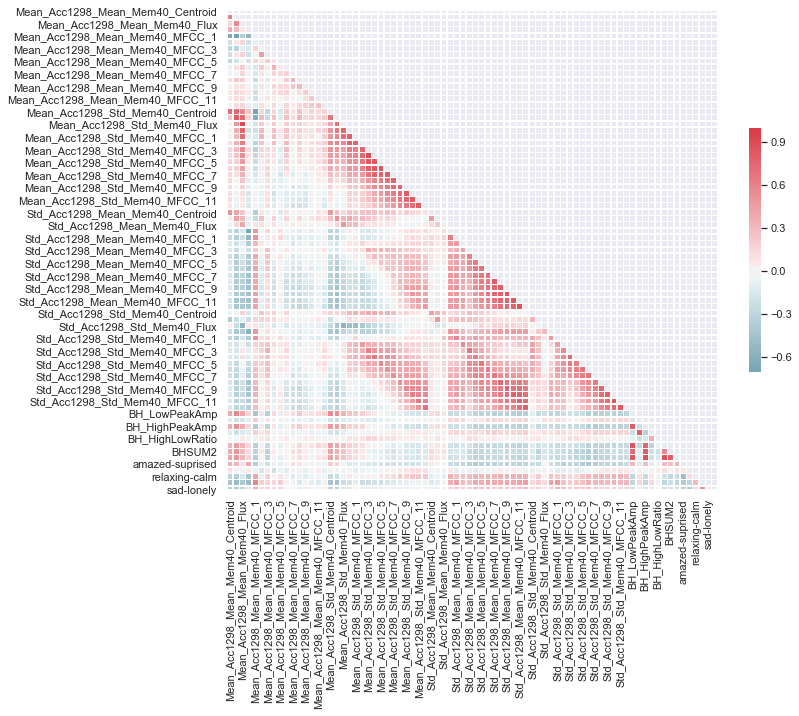

In [55]:
corr = df.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

A matriz acima mostra que existem um número considerável de atributos com uma correlação positiva forte (representados pela cor vermelha mais forte), quanto a correlação negativa, nenhum par de atributo aparenta ter uma correlação negativa forte (no caso do mapa acima a maior está próxima de -0.6).

Tendo em vista a alta dimensionalidade da base de dados, é mais interessante inicialmente visualizar a matriz de correlação dos atributos de entrada em relação aos atributos desejados.

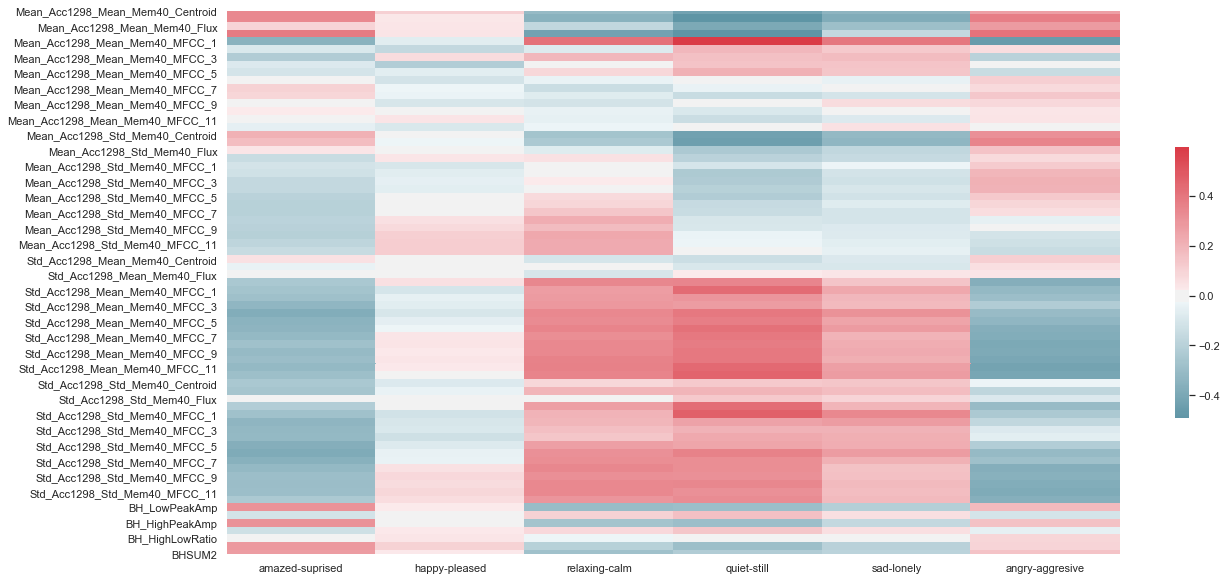

In [56]:
correl = df.corr().iloc[ : -6, -6: ]
#correl = df.corr()
#correl.style.background_gradient(cmap = 'coolwarm')
sns.heatmap(correl, cmap = cmap, center = 0,
            square = False, cbar_kws = {"shrink": .5})

Pela matriz acima, é possível perceber que nenhum atributo de entrada possui uma correlação forte (> 0.8, em valores absolutos) com algum atributo alvo. Além disso, entre os 6 atributos alvo, o 'happy-pleased' é o que possui a correlação mais fraca com os atributos de entrada. Vejamos agora a correlação entre os atributos alvo:

In [57]:
correl_targets = df.corr().iloc[-6 : , -6: ]

correl_targets.style.background_gradient(cmap = 'coolwarm')

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
amazed-suprised,1,0.0625649,-0.477873,-0.370126,-0.321184,0.293468
happy-pleased,0.0625649,1,0.129219,-0.298822,-0.383677,-0.329735
relaxing-calm,-0.477873,0.129219,1,0.298812,0.152166,-0.561723
quiet-still,-0.370126,-0.298822,0.298812,1,0.54541,-0.377725
sad-lonely,-0.321184,-0.383677,0.152166,0.54541,1,-0.269406
angry-aggresive,0.293468,-0.329735,-0.561723,-0.377725,-0.269406,1


Novamente, há uma ausência de correlação forte entre um par distinto de atributos que busca-se prever. Por fim, com base na correlação entre os atributos de entrada, vejamos quais são as maiores:

In [58]:
correl_in = df.corr().iloc[ : -6, : - 6]

c = correl_in.abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort")

# Indices obtidos na mao
print(so[-120:-72])

BH_HighPeakAmp                   BHSUM2                             0.800536
BHSUM2                           BH_HighPeakAmp                     0.800536
BHSUM3                           BHSUM2                             0.800814
BHSUM2                           BHSUM3                             0.800814
Mean_Acc1298_Std_Mem40_MFCC_12   Mean_Acc1298_Std_Mem40_MFCC_11     0.803408
Mean_Acc1298_Std_Mem40_MFCC_11   Mean_Acc1298_Std_Mem40_MFCC_12     0.803408
Std_Acc1298_Mean_Mem40_MFCC_7    Std_Acc1298_Mean_Mem40_MFCC_8      0.804741
Std_Acc1298_Mean_Mem40_MFCC_8    Std_Acc1298_Mean_Mem40_MFCC_7      0.804741
Mean_Acc1298_Mean_Mem40_Rolloff  Mean_Acc1298_Std_Mem40_Rolloff     0.809104
Mean_Acc1298_Std_Mem40_Rolloff   Mean_Acc1298_Mean_Mem40_Rolloff    0.809104
Mean_Acc1298_Std_Mem40_MFCC_6    Mean_Acc1298_Std_Mem40_MFCC_7      0.810537
Mean_Acc1298_Std_Mem40_MFCC_7    Mean_Acc1298_Std_Mem40_MFCC_6      0.810537
BH_LowPeakAmp                    BH_HighPeakAmp                     0.816633

Este último código mostra que existem 24 pares distintos que possuem uma correlação forte (> 0.8), logo executar a técnica da análise principal de componentes (PCA) poderá ajudar a diminuir a dimensionalidade desta base de dados adiante.

## Detectando outliers

Por conta da alta dimensionalidade da base de dados, a detecção de outliers será feita utilizando um laço percorrendo todas as colunas da base de dados, checando se existe algum outlier para tal coluna em cada iteração, caso positivo tais linhas que contém outliers são inseridas em uma lista, além de que é mostrado a quantidade de outliers para tal atributo (e sua porcentagem em relação ao total). 

A métrica utilizada para detectar outlier é o Z-score que mede o relacionamento de um valor para a média de um grupo de valores, medida em termos do desvio padrão da média, um valor 0 indica que o valor é identico ao 'score' da média e que um valor de 1.0 indica que o valor está a um desvio padrão da média. 

Neste caso, o valor utilizado para filtragem será 3.0, o que significa que valores que estão a três desvios padrões ou mais da média (em termos absolutos) serão considerados como outliers.


Colunas com outliers: 70 (Pct = 0.90)

Total: 486


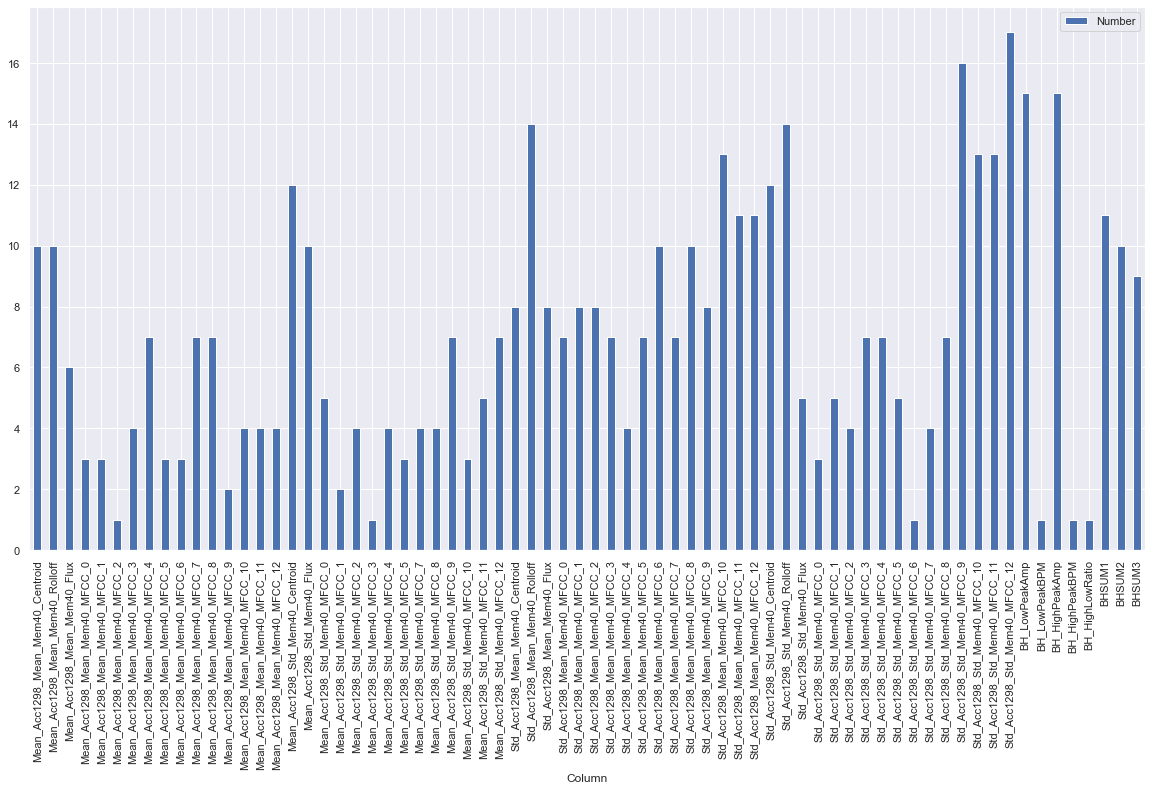

In [59]:
threshold = 3
outliers = []
columns = []
results = []
total = 0
for column in df.columns:
    outs = len(df[(np.abs(stats.zscore(df[column])) >= threshold)])
    total += outs
    if(outs > 0):
        columns.append(column)
        outliers.append(df[(np.abs(stats.zscore(df[column])) >= threshold)])
        results.append({"Number": len(df[(np.abs(stats.zscore(df[column])) >= threshold)]), "Column": column})
        #print("Outliers em %s: %d (Pct = %.2f)" % (column, outs, outs/len(df)))

print("\nColunas com outliers: %d (Pct = %.2f)" % (len(outliers), len(outliers)/len(df.columns)))
print("\nTotal: %d" % (total))

pd.DataFrame(results).plot.bar(x = "Column", y = "Number", figsize = (20, 10))

Pelo resultado acima, 90% das colunas possuem pelo menos 1 outlier, enquanto que nenhuma coluna possui mais do que 17 (ou 3%) dos seus valores como outliers. 

Abaixo, vejamos a quantidade de entradas na base de dados que possuem pelo menos um outlier em uma das colunas:

In [60]:
outliers_df = pd.concat(outliers)

outliers_df.drop_duplicates(keep = 'first', inplace = True)

print("Instancias com outliers:", len(outliers_df))

outliers_df.head()

Instancias com outliers: 184


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
44,0.172193,0.515556,0.089991,-72.913644,1.839893,2.311600,0.980418,0.896726,0.706043,0.739761,...,2.0,1.671050,1.646543,3.331277,1,1,0,0,0,0
91,0.168687,0.698277,0.093261,-73.425628,1.493242,2.140450,0.850997,1.201210,1.039796,0.835462,...,2.0,0.665140,0.694562,1.507699,1,0,0,0,0,1
101,0.188637,0.537260,0.096170,-77.755431,0.697836,1.256725,1.018783,0.604422,0.062336,-0.222341,...,2.0,1.443186,1.762948,3.206134,0,0,0,0,0,1
111,0.172679,0.504049,0.098053,-69.838918,1.960140,0.882767,0.600617,0.740820,0.494457,0.262374,...,2.0,0.448257,1.175462,2.258324,1,0,0,0,0,1
136,0.174965,0.544257,0.085136,-68.118250,1.660375,0.367742,0.917574,0.990992,0.917184,0.359717,...,2.0,1.201197,1.435895,2.656136,1,0,0,0,0,0


Existem 184 linhas com outlier em pelo menos uma coluna (ou 31% da base dados contém um outlier em pelo menos uma das colunas), o que significa que eliminar todas essas linhas simplesmente poderá empobrecer a base de dados. Por ora, pelo fato do alto número de outliers e o desconhecimento do que se trate cada atributo, não será feito nenhum tratamento para outliers.

## Balanceamento das classes

Quantidade de amazed-suprised 0: 420 (Pct = 0.708)
Quantidade de amazed-suprised 1: 173 (Pct = 0.292)
Quantidade de happy-pleased 0: 427 (Pct = 0.720)
Quantidade de happy-pleased 1: 166 (Pct = 0.280)
Quantidade de relaxing-calm 0: 329 (Pct = 0.555)
Quantidade de relaxing-calm 1: 264 (Pct = 0.445)
Quantidade de quiet-still 0: 445 (Pct = 0.750)
Quantidade de quiet-still 1: 148 (Pct = 0.250)
Quantidade de sad-lonely 0: 425 (Pct = 0.717)
Quantidade de sad-lonely 1: 168 (Pct = 0.283)
Quantidade de angry-aggresive 0: 404 (Pct = 0.681)
Quantidade de angry-aggresive 1: 189 (Pct = 0.319)


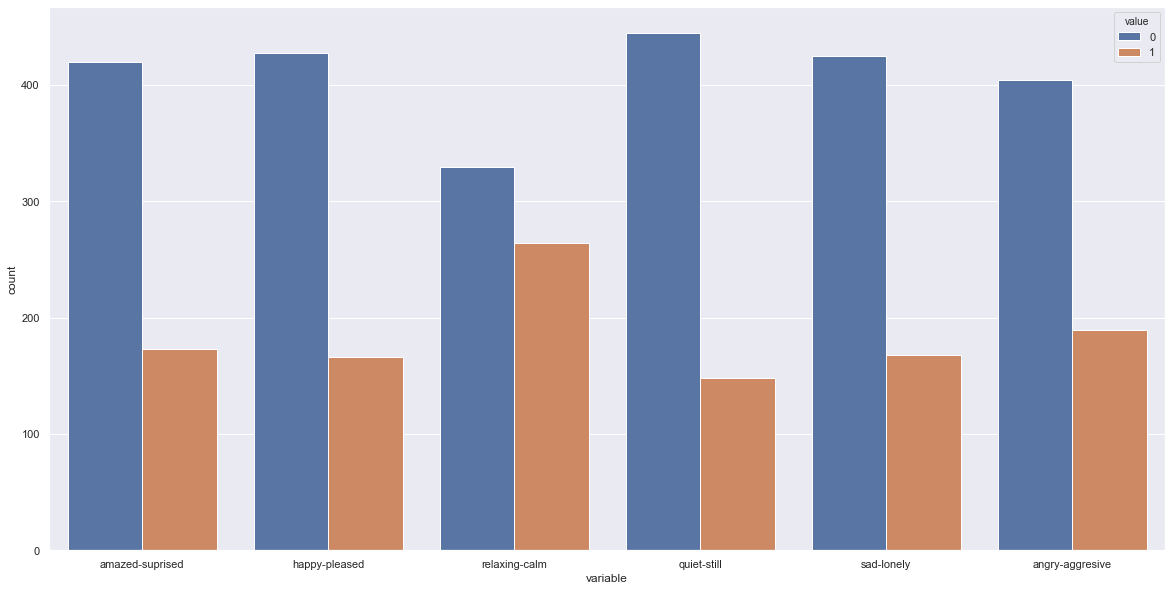

In [61]:
melt = pd.melt(df[labels])
sns.set(rc = {'figure.figsize':(20, 10)})
sns.countplot(data = melt.loc[melt['value'] >= 0], x = 'variable', hue = 'value')
for label in labels:
    count = df[label].value_counts()
    print("Quantidade de %s 0: %d (Pct = %.3f)" %(label, count[0], count[0] / len(df)))
    print("Quantidade de %s 1: %d (Pct = %.3f)" %(label, count[1], count[1] / len(df)))

Pelo gráfico acima, se analisado individualmente as classes, percebe-se que com exceção de relaxing-calm, o balanceamento de cada classe está na proporção 3:1 ou pior, mesmo se considerado relaxing-calm, nenhuma classe possui um desbalanceamento menor que 10%, em termos proporcionais.

Agora considerando apenas os valores '1' de cada atributo, o gráfico obtido é o seguinte:

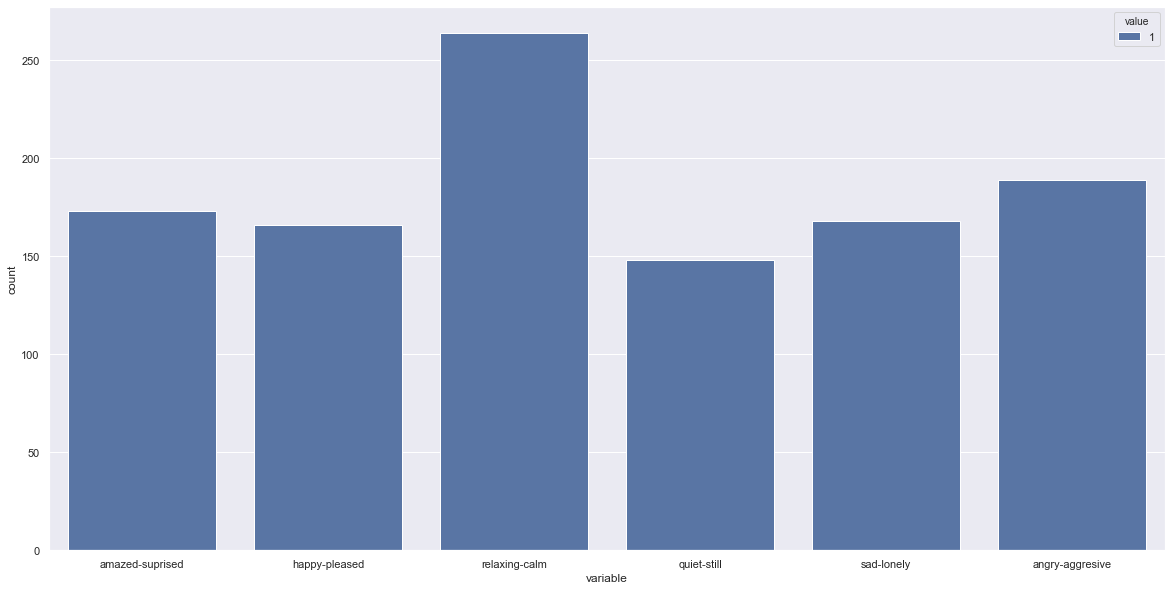

In [62]:
sns.countplot(data = melt.loc[melt['value'] == 1], x = 'variable', hue = 'value')

Desta maneira, o que se observa é que a classe relaxing-calm se encontra desbalanceada em relação as outras classes (em termos proporcionais ocorre pelo menos 10% mais do que qualquer outra classe), enquanto que as outras classes estão razoavelmente balanceadas entre si, ocorrendo em 25% a 31.9% dos objetos. 

Sendo assim, a decisão tomada aqui é de manter o balanceamento da maneira que se encontra.

## Normalização dos atributos
Por conta da falta de tratamento para outliers é feita a normalização dos atributos por meio da padronização, que pode vir a lidar melhor com outliers não tratados anteriormente.

In [63]:
df_labels = df[labels].copy()

dummy_df = df.copy()
dummy_df.drop(columns = labels, inplace = True)

scaler = preprocessing.StandardScaler()

scaled = pd.concat([pd.DataFrame(scaler.fit_transform(dummy_df), columns = dummy_df.columns.values), df_labels], axis=1)

scaled.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,-1.105588,-0.899816,0.597753,-0.040161,0.597089,0.012470,0.565174,0.378949,1.270225,0.166709,...,-0.315080,-0.493653,-0.690238,-0.851414,0,1,1,0,0,0
1,0.385855,0.658245,0.004144,1.374865,-0.867621,-0.807026,-2.527081,-0.031013,-1.020242,-1.539939,...,-0.315080,-0.204534,-0.216973,-0.382298,1,0,0,0,0,1
2,1.318818,0.665224,-0.138854,1.024886,-1.055153,0.036048,-0.681981,0.275978,-0.936280,0.394614,...,2.851744,-0.660964,-0.853584,-0.771613,0,1,0,0,0,1
3,-0.858043,0.033036,0.837920,-0.964686,0.408315,0.045688,0.099403,1.921137,-0.255584,0.995258,...,-0.315080,-0.914017,-0.312101,-0.934927,0,0,1,0,0,0
4,0.167606,-0.463967,-0.638319,-2.732823,0.272482,0.454261,-1.312511,0.571361,-0.357706,-0.057338,...,-0.315080,-0.641796,-0.121837,-0.423919,0,0,0,1,0,0


## Executando os algoritmos
Inicialmente, gera-se o conjunto de treinamento e teste, a divisão utilizada é a 80/20, sendo ambas geradas de maneira semi-aleatória, a partir do parâmetro 'random_state'.

In [64]:
train, test = model_selection.train_test_split(scaled.copy(), test_size = 0.2, random_state = 77, shuffle = True)

trainTarget = train[labels].copy()
testTarget = test[labels].copy()

train.drop(columns = labels, inplace = True)
test.drop(columns = labels, inplace = True)

O primeiro algoritmo utilizado será o de vizinho mais próximo (K-NN), o motivo da escolha é que por ser um dos algoritmos de aprendizagem de máquina mais simples, pode ser utilizado para entender se um problema como é o caso deste, pode ser resolvido com resultados satisfatórios utilizando este algoritmo, e também como algoritmos mais elaborados se compararam frente a este neste mesmo problema.

Inicialmente os parâmetros para o número de vizinhos serão 3 e a métrica de distância será a de minkowski, que é equivalente a euclidiana para o parâmetro p = 2.

In [65]:
classifierKnn = multiclass.OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2, metric = "minkowski"))
classifierKnn.fit(train, trainTarget)
resultKnn = classifierKnn.predict(test)

O segundo algoritmo utilizado será a SVM (Support Vector Machine) para classificação, algoritmo recomendado para espaços com alta dimensionalidade, que é o caso da base de dados tratada nesta questão:

Inicialmente, os parâmetros utilizados para função kernal será a 'poly', que utilizará um hiperplano não-linear para separar os dados, e o parâmetro gamma que é utilizado para hiperplanos deste tipo, quanto maior o gamma, melhor o modelo se ajusta ao conjunto de treinamento, aqui o gamma inicial utilizado será o 'scale' que é calculado utilizando a fórmula 1 / (número de atributos * variância da base de dados).

O parâmetro random_state é utilizado para poder replicar os resultados obtidos posteriormente, pois este algoritmo faz uso de um número gerado aleatoriamente por meio de um seed (no caso, o random_state) para misturar os dados para estimação de probabilidades.

In [66]:
classifierSvc = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'poly', gamma = 'scale', random_state = 42))
classifierSvc.fit(train, trainTarget)
resultSvc = classifierSvc.predict(test)

Para avaliação do desempenho dos algoritmos serão utilizados as métricas F1, acurácia, sensibilidade e especificidade, além da matriz de confusão:

A matriz de confusão está no formato: 

[[verdadeiro negativo, falso positivo] 

[falso negativo, verdadeiro positivo]]

In [67]:
def getMetrics(target, result, labels, algorithm = "Unnamed", plot = True):
    if algorithm != "Unnamed":
        print(algorithm)
    print("F1: %0.3f" % (metrics.f1_score(target, result, average = 'macro')))
    print("Acuracia: %0.3f" % (metrics.accuracy_score(target, result, normalize = True)))
    
    matrix = metrics.multilabel_confusion_matrix(target, result)
    sens = 0
    spec = 0
    results = []
    for i in range(len(matrix)):
        [[true_negative, false_positive], [false_negative, true_positive]] = matrix[i]
        sen = (true_positive / (true_positive + false_negative))
        sp = (true_negative / (true_negative + false_positive))
        sens += sen
        spec += sp
        results.append({"Label": labels[i], "Sensibilidade": sen, "Especificidade": sp})
        
    print("Sensibilidade: %0.3f" % (sens / len(matrix)))
    print("Especificidade: %0.3f\n" % (spec / len(matrix)))
    if plot is True:
        pd.DataFrame(results).plot.bar(x = "Label")

def getMatrix(target, result, algorithm = "Unnamed"):
    if algorithm != "Unnamed":
        print(algorithm)
    matrix = metrics.multilabel_confusion_matrix(target, result)
    for i in range(len(matrix)):
        print("Matriz de confusão para %s" % (labels[i]))
        print(matrix[i])
        print()

K-NN (vs Test)
F1: 0.648
Acuracia: 0.269
Sensibilidade: 0.627
Especificidade: 0.845

Matriz de confusão para amazed-suprised
[[76 11]
 [15 17]]

Matriz de confusão para happy-pleased
[[68  9]
 [24 18]]

Matriz de confusão para relaxing-calm
[[38 26]
 [13 42]]

Matriz de confusão para quiet-still
[[80  6]
 [ 7 26]]

Matriz de confusão para sad-lonely
[[72 10]
 [11 26]]

Matriz de confusão para angry-aggresive
[[80  8]
 [14 17]]

K-NN (vs Train)
F1: 0.786
Acuracia: 0.508
Sensibilidade: 0.766
Especificidade: 0.921



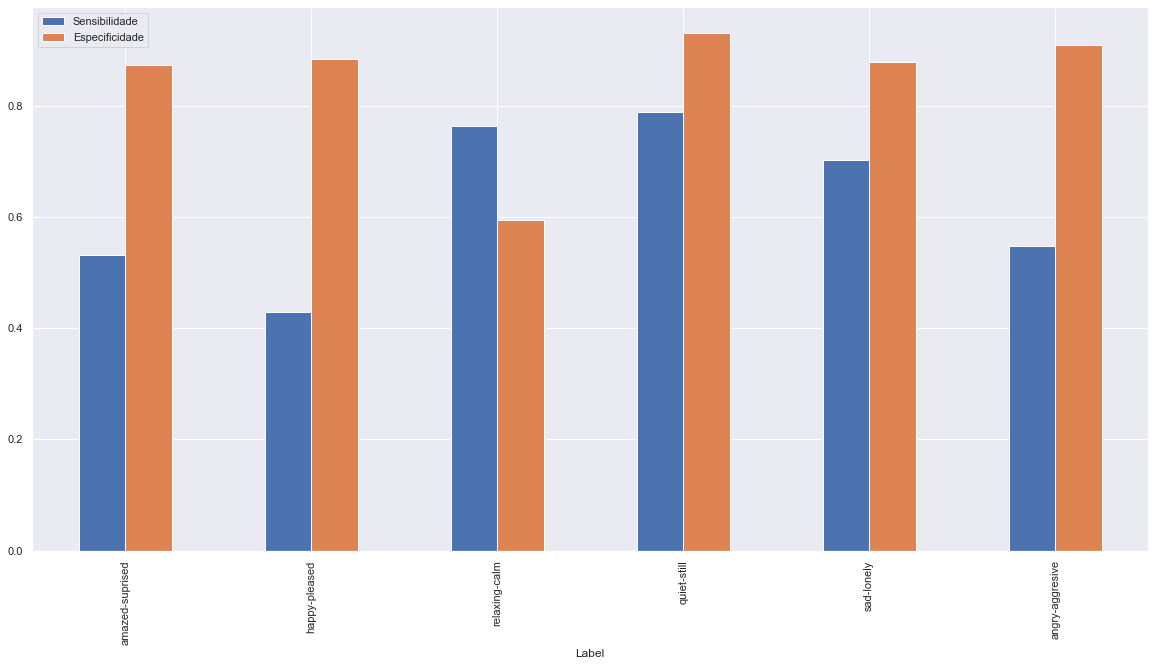

In [68]:
getMetrics(testTarget, resultKnn, labels, "K-NN (vs Test)")
getMatrix(testTarget, resultKnn)
getMetrics(trainTarget, classifierKnn.predict(train), labels, "K-NN (vs Train)", plot = False)

SVC (vs Test)
F1: 0.409
Acuracia: 0.134
Sensibilidade: 0.302
Especificidade: 0.945

Matriz de confusão para amazed-suprised
[[83  4]
 [21 11]]

Matriz de confusão para happy-pleased
[[73  4]
 [41  1]]

Matriz de confusão para relaxing-calm
[[52 12]
 [23 32]]

Matriz de confusão para quiet-still
[[86  0]
 [22 11]]

Matriz de confusão para sad-lonely
[[82  0]
 [27 10]]

Matriz de confusão para angry-aggresive
[[84  4]
 [23  8]]

SVC (vs Train)
F1: 0.676
Acuracia: 0.460
Sensibilidade: 0.532
Especificidade: 0.994



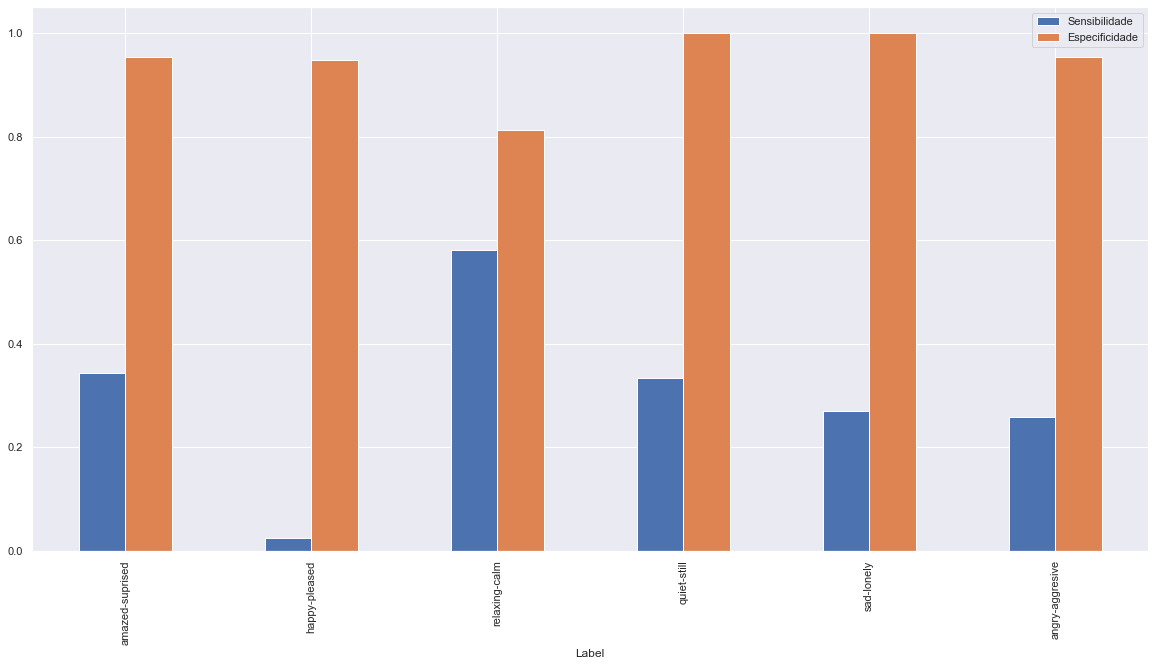

In [69]:
getMetrics(testTarget, resultSvc, labels, "SVC (vs Test)")
getMatrix(testTarget, resultSvc)
getMetrics(trainTarget, classifierSvc.predict(train), labels, "SVC (vs Train)", plot = False)

Pelos resultados acima, o que se têm é que ambos os algoritmos não obtiveram um desempenho ruim frente ao conjunto de teste. Vejamos os resultados de cada métrica:

Para o caso da sensibilidade, a análise dos dois gráficos mostra que o modelo da SVC falhou terrívelmente em classificar corretamente as
os objetos como positivos em cada atributo, sendo o caso mais gritante o de happy-pleased, onde é possível ver pela matriz de confusão que apenas 1 instância foi corretamente classificada como tal, sendo que neste caso apenas 5 instâncias foram classificadas como happy-pleased.

Enquanto que, os resultados vistos para a especificidade, apontam que na maior parte dos atributos, os objetos foram corretamente classificados como negativos, contudo o atributo em que a métrica apresentou o pior desempenho foi o de relaxing-calm.

Para estas duas métricas, a impressão que se tem é que o desbalanceamento das classes levou o modelo a tender classificar os objetos mais para negativo, que é justamente a classe predominante para todos os atributos que se deseja prever, obtendo assim resultados melhores para especificidade, principalmente pelo SVC.

Quanto a acurácia, o resultado mostra que ambos os modelos não conseguiram prever mais de 30% dos objetos corretamente de maneira completa (i.e. todos os atributos foram classificados corretamente), sendo o melhor resultado obtido pelo K-NN.

Esta métrica acaba por resultar em um número menor pelo fato de que como o modelo não tende a classificar corretamente os objetos em todos os atributos e apresenta um viés para a classe majoritária (0 em todos os atributos), o objeto acaba por ser considerado incorretamente classificado, em pelo menos um dos atributos na maioria das instâncias utilizadas para teste.

Quanto a métrica F1, percebe-se que esta apresentou valores maiores que a acurácia, isso pelo fato de que ela usa a média da medida F1 em cada atributo, contudo, outro fator para um medida maior é que todos os atributos apresentam um desbalanceamento, sendo assim como a métrica busca uma média ponderada entre a precisão e a sensibilidade, o resultado acaba por se diferir da acurácia.

Por fim, percebe-se pelas matrizes de confusão, que de fato os modelos tenderam a classificar mais os objetos como sendo das classes majoritárias, resultando assim, em um número muito maior de Verdadeiros e Falsos Negativos do que de Verdadeiros e Falsos Positivos.

## Alterando parâmetros
Usando o mesmo conjunto de treinamento e testa, desta vez, reexcuta-se os algoritmos alterando os parâmetros deles.

Para o K-NN a função de distância será alterada para manhattan, que é dado pelo somátorio dos valores em cada dimensão, enquanto que o número de vizinhos será alterado por meio de um laço.

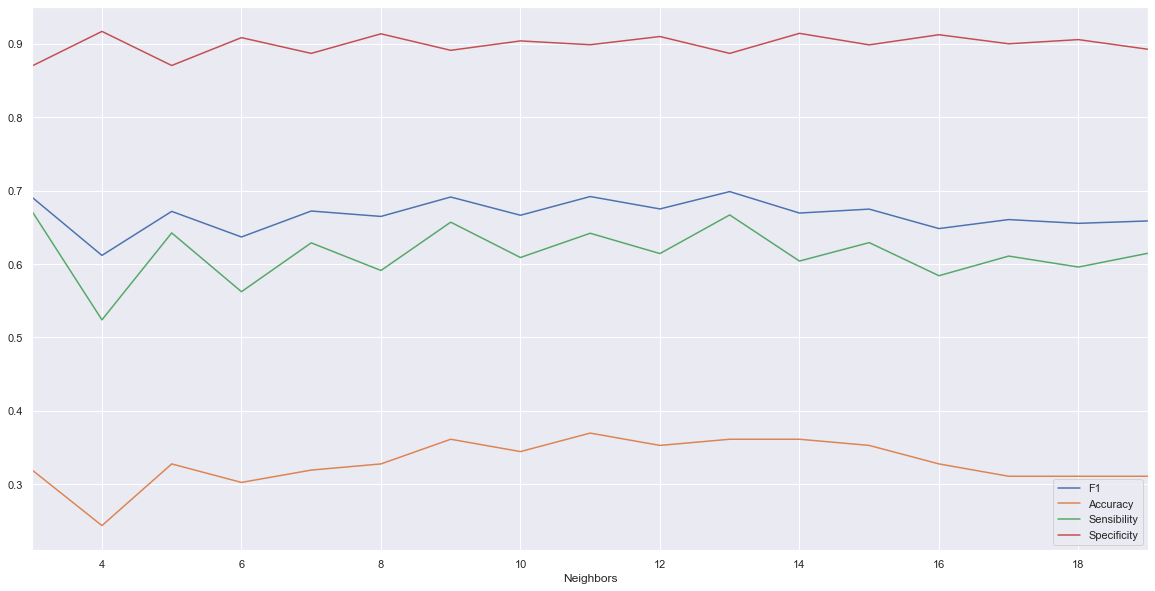

In [70]:
results_neighbors = []

for n in range(3, 20):
    classifierKnn = multiclass.OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors = n, p = 2, metric = "manhattan"))
    classifierKnn.fit(train, trainTarget)
    resultKnn = classifierKnn.predict(test)
    
    matrix = metrics.multilabel_confusion_matrix(testTarget, resultKnn)
    sens = 0
    spec = 0
    for i in range(len(matrix)):
        [[true_negative, false_positive], [false_negative, true_positive]] = matrix[i]
        sen = (true_positive / (true_positive + false_negative))
        sp = (true_negative / (true_negative + false_positive))
        sens += sen
        spec += sp        
    
    results_neighbors.append({"Neighbors": n, 
                         "F1": metrics.f1_score(testTarget, resultKnn, average = 'macro'),
                         "Accuracy": metrics.accuracy_score(testTarget, resultKnn, normalize = True),
                         "Sensibility": sens / len(matrix),
                         "Specificity": spec / len(matrix)})
    
pd.DataFrame(results_neighbors).plot.line(x = "Neighbors",
                                y = ["F1", "Accuracy", "Sensibility", "Specificity"])

Pelo gráfico acima, percebe-se que para 3 vizinhos, os resultados obtidos foram melhores que o K-NN usando a distância euclidiana, além disso números pares de vizinhos aparentam causar um desempenho pior no modelo (talvez pelo critério de desempate), sendo que o modelo apresentou resultados melhores para um valor de N igual a 11.

Quanto ao SVC, o parâmetro da função kernel será alterado para rbf e o parâmetro do gamma para auto, que irá resultar em gamma = (1 / número de atributos):

In [71]:
classifierSvc2 = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'rbf', gamma = 'auto', random_state = 42))
classifierSvc2.fit(train, trainTarget)
resultSvc2 = classifierSvc2.predict(test)

In [72]:
getMetrics(testTarget, resultSvc2, labels, "SVC V2 (vs Test)", plot = False)
#getMatrix(testTarget, resultSvc2)
getMetrics(trainTarget, classifierSvc2.predict(train), labels, "SVC V2 (vs Train)", plot = False)

SVC V2 (vs Test)
F1: 0.656
Acuracia: 0.286
Sensibilidade: 0.603
Especificidade: 0.899

SVC V2 (vs Train)
F1: 0.803
Acuracia: 0.555
Sensibilidade: 0.749
Especificidade: 0.957



Em comparação a execução anterior, percebe-se que a alteração dos parâmetros gerou resultados melhores em todas as métricas, exceto pela especificidade, além do modelo ter se ajustado melhor ao treinamento, muito pelo fato do gamma utilizado ser maior (quanto maior o valor de gama melhor o modelo se ajusta ao treinamento), contudo, antes de concluir sobre o impacto da função kernel vejamos utilizando um valor gamma igual ao utilizado anteriormente:

In [73]:
classifierSvc3 = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'rbf', gamma = 'scale', random_state = 42))
classifierSvc3.fit(train, trainTarget)
resultSvc3 = classifierSvc3.predict(test)

In [74]:
getMetrics(testTarget, resultSvc3, labels, "SVC V3 (vs Test)", plot = False)
#getMatrix(testTarget, resultSvc2)
getMetrics(trainTarget, classifierSvc3.predict(train), labels, "SVC V3 (vs Train)", plot = False)

SVC V3 (vs Test)
F1: 0.657
Acuracia: 0.286
Sensibilidade: 0.606
Especificidade: 0.897

SVC V3 (vs Train)
F1: 0.800
Acuracia: 0.551
Sensibilidade: 0.746
Especificidade: 0.956



O resultado acima acaba por provar o contrário: Na realidade, o parâmetro que teve o maior impacto foi o de mudar a função kernel.

## Conclusão

Todos os modelos apresentaram um desempenho relativamente ruim, o que se justifica em grande parte pelo desbalanceamento presente entre as classes, um problema que não foi tratado, além de outliers que se encontram presentes na base de dados, onde apesar de detectados, foi optado por não fazer a remoção destes por conta do alto número.

Por fim, o fato dos atributos possuírem nomes que não ajudam a explicar do que estes se tratam, também vem a atrapalhar no pré-processamento, e consequentemente, na geração dos modelos.